In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [30]:
from sklearn.datasets import load_iris

In [31]:
data= load_iris()

In [4]:
X = pd.DataFrame(data['data'],columns=data['feature_names'])
y = data['target']

<AxesSubplot:>

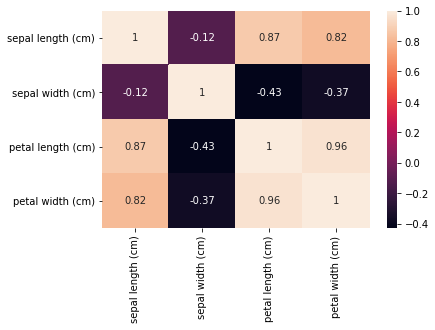

In [5]:
# sns.pairplot(X)
plt.figure()
sns.heatmap(X.corr(),annot=True)

In [6]:
X=X.drop(columns=['sepal width (cm)'],axis=1)
X.head()

,sepal length (cm),petal length (cm),petal width (cm)
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2


<AxesSubplot:>

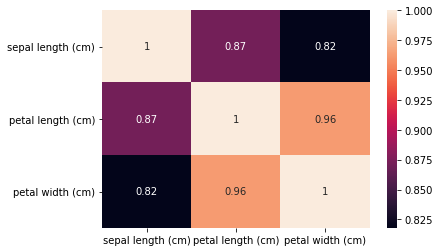

In [7]:
sns.heatmap(X.corr(),annot=True)


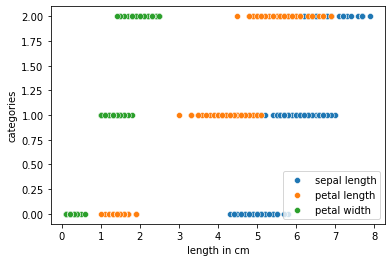

In [40]:
plt.figure()
plt.ylabel('categories')
plt.xlabel('length in cm')
sns.scatterplot(X.iloc[:,0],y) #sepal length
sns.scatterplot(X.iloc[:,1],y) #petal length
sns.scatterplot(X.iloc[:,2],y) #petal width
name = ['sepal length', 'petal length', 'petal width']
plt.legend(name)


In [9]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=4,test_size=0.25)

In [10]:
logreg = LogisticRegression(random_state=5)
logreg.fit(x_train,y_train) 

LogisticRegression(random_state=5)

In [11]:
ypred = logreg.predict(x_test)

In [12]:
pd.DataFrame({'actual y':y_test , 'predicted':ypred}).head()

,actual y,predicted
0,2,2
1,0,0
2,2,2
3,2,2
4,2,2


In [13]:
mean_squared_error(y_test,ypred)

0.02631578947368421

In [14]:
logreg.score(x_train,y_train),logreg.score(x_test,y_test)

(0.9821428571428571, 0.9736842105263158)

In [15]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [16]:
name = ['setosa', 'versicolor', 'virginica']


In [17]:
x=32
print(x_test.iloc[x,:])
yhat = logreg.predict([x_test.iloc[x,:]])
print(f'\n real y[{x}] {name[y_test[x]]}, ------------- yhat[{x}] {name[yhat[0]]}')

sepal length (cm)    6.7
petal length (cm)    5.8
petal width (cm)     1.8
Name: 108, dtype: float64

 real y[32] virginica, ------------- yhat[32] virginica
